In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [6]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00


In [7]:
%cd '/content/drive/My Drive/Datathon'

df = pd.read_csv('Bank Account Fraud.csv')

/content/drive/My Drive/Datathon


In [11]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [15]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive


  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


In [13]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [14]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 15.1 MB/s eta 0:00:00


In [10]:
!pip install matplotlib-venn

In [18]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


Column wise missing values
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                 

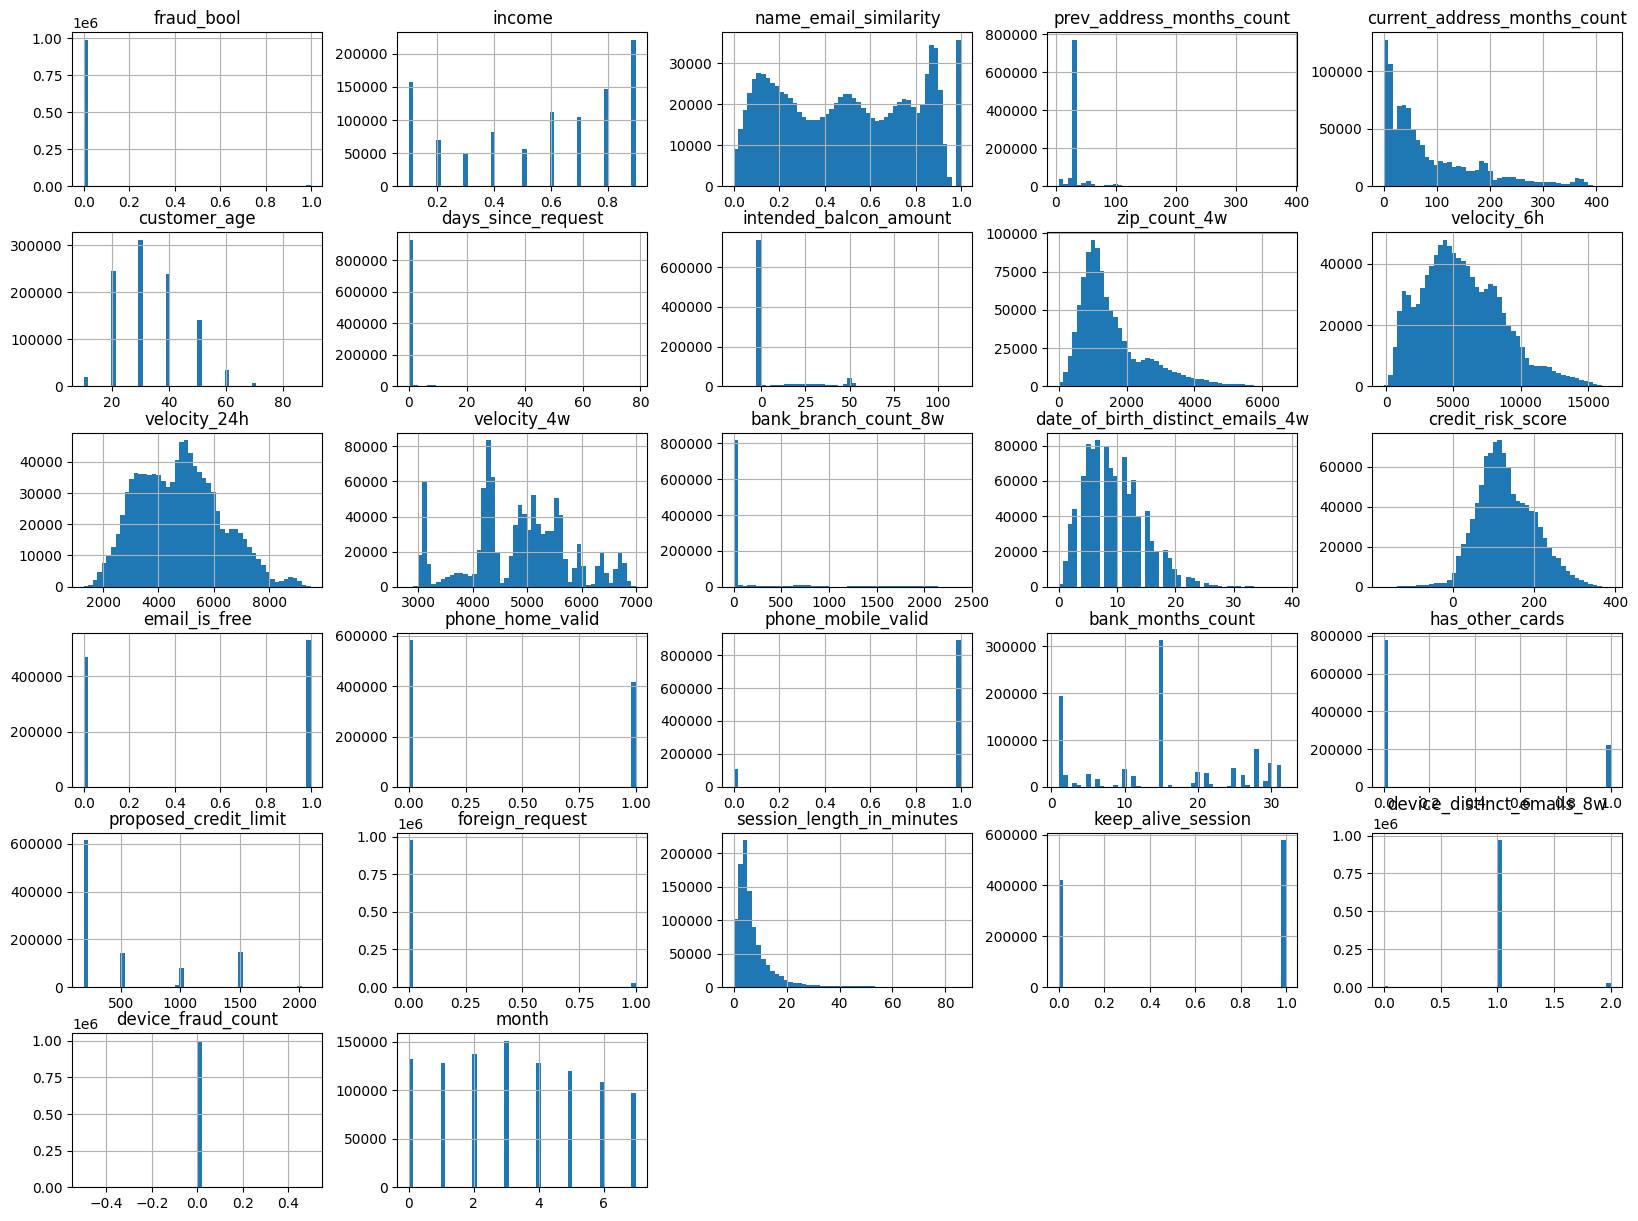

In [19]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Replace negative values with NaN
df.replace(-1, np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Column wise missing values")
print(missing_values)


# Filling missing values for 'keep_alive_session' with mode imputer
mode_value = df['keep_alive_session'].mode()[0]
df['keep_alive_session'].fillna(mode_value, inplace=True)

# Specify the attributes and perform median imputation
attributes_to_impute = ['device_fraud_count', 'month', 'credit_risk_score', 'prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# Convert the dataframe to numeric to avoid 'NAType' error
df[attributes_to_impute] = df[attributes_to_impute].apply(pd.to_numeric, errors='coerce')

# Initialize the SimpleImputer with 'median'
imputer = SimpleImputer(strategy='median')

# perform median imputation
for attribute in attributes_to_impute:
    df[attribute] = imputer.fit_transform(df[[attribute]])

# Verifying that missing values have been filled
print("Number of missing values after imputation:")
print(df[attributes_to_impute].isnull().sum())


#To plot histograms to interpret the attributes
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()


#To encode categorical data
import category_encoders as ce

#For balancing the dataset

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss


attributes = [
    'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
    'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
    'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
    'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes',
    'device_distinct_emails_8w', 'device_fraud_count', 'month',
    'employment_status', 'housing_status', 'payment_type', 'source'
]

# Creating new DataFrame X containing the specified attributes
X = df[attributes].copy()
y = df['fraud_bool']
# Target encoding
target_encoder = TargetEncoder()
X_encoded = target_encoder.fit_transform(X, y)

# Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Applying oversampling (ADASYN) only to the train set
adasyn = ADASYN(random_state=42)
X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train, y_train)


In [20]:
from catboost import CatBoostClassifier

# Initializing CatBoost model
cat_model = CatBoostClassifier()

# Training the model
cat_model.fit(X_train_oversampled, y_train_oversampled)

# Making predictions
cat_pred = cat_model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

# Calculating ROC-AUC for CatBoost
cat_auc = roc_auc_score(y_test, cat_pred)
print("CatBoost ROC-AUC:", cat_auc)

Learning rate set to 0.239361
0:	learn: 0.4810331	total: 702ms	remaining: 11m 41s
1:	learn: 0.3344198	total: 1.12s	remaining: 9m 20s
2:	learn: 0.2683972	total: 1.56s	remaining: 8m 38s
3:	learn: 0.2374026	total: 1.91s	remaining: 7m 55s
4:	learn: 0.2055179	total: 2.35s	remaining: 7m 47s
5:	learn: 0.1878660	total: 2.72s	remaining: 7m 31s
6:	learn: 0.1540151	total: 3.15s	remaining: 7m 27s
7:	learn: 0.1284954	total: 3.82s	remaining: 7m 54s
8:	learn: 0.1227958	total: 4.46s	remaining: 8m 11s
9:	learn: 0.1025988	total: 5.21s	remaining: 8m 35s
10:	learn: 0.0928112	total: 5.91s	remaining: 8m 51s
11:	learn: 0.0834404	total: 6.67s	remaining: 9m 8s
12:	learn: 0.0788439	total: 7.33s	remaining: 9m 16s
13:	learn: 0.0756203	total: 7.85s	remaining: 9m 12s
14:	learn: 0.0728020	total: 8.27s	remaining: 9m 3s
15:	learn: 0.0699698	total: 8.66s	remaining: 8m 52s
16:	learn: 0.0646746	total: 9.04s	remaining: 8m 42s
17:	learn: 0.0633734	total: 9.42s	remaining: 8m 33s
18:	learn: 0.0627560	total: 9.82s	remaining: 